In [2]:
import cv2
import numpy as np
import os

import matplotlib.pyplot as plt

### Load the Camera matrix and Distortion Coefficient

In [3]:
with np.load('camera_matrix.npz') as file:
    mtx,dist=[file[i] for i in ['mtx','dist']]

In [4]:
wc = 10  ## 체스 보드 가로 패턴 개수 - 1
hc = 7  ## 체스 보드 세로 패턴 개수 - 1
objp = np.zeros((wc * hc, 3), np.float32)
objp[:, :2] = np.mgrid[0:wc, 0:hc].T.reshape(-1, 2)

In [5]:
axis = np.float32([[3,0,0], [0,3,0], [0,0,-3]]).reshape(-1,3)    #axis point for draw axis
                                                                 #this for draw a x,y,z axis

In [13]:
axis = np.float32([[0,0,0], [0,3,0], [3,3,0], [3,0,0],
                   [0,0,-3],[0,3,-3],[3,3,-3],[3,0,-3] ])    # this for draw a cube

### To draw cube

In [15]:
def draw_cube(img, corners, imgpts):
    imgpts = np.int32(imgpts).reshape(-1,2)
    img = cv2.drawContours(img, [imgpts[:4]],-1,(0,255,0),3)
    for i,j in zip(range(4),range(4,8)):
        img = cv2.line(img, tuple(imgpts[i]), tuple(imgpts[j]),(255),3)
    img = cv2.drawContours(img, [imgpts[4:]],-1,(0,0,255),3)
    return img

### To draw axis

In [14]:
def draw(img, corners, imgpts):
        corner = tuple(corners[0].ravel())
        print(corner)
        img = cv2.line(img, [int(i) for i in corner], [int(i) for i in imgpts[0].ravel()],(255, 0, 0),5)

        img = cv2.line(img, [int(i) for i in corner], [int(i) for i in imgpts[1].ravel()],(0, 255, 0),5)

        img = cv2.line(img, [int(i) for i in corner], [int(i) for i in imgpts[2].ravel()],(0, 0, 255),5)
        return img

### Draw from Images

(171.0, 1470.0)


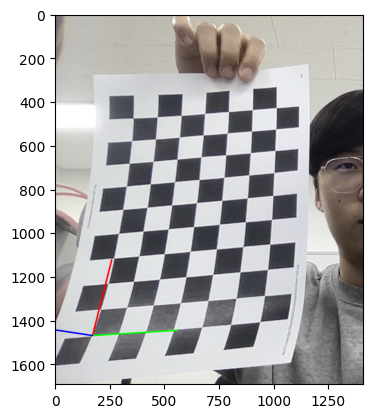

In [11]:
im=cv2.imread('./images/chess2.png')
gray=cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
ret,corners = cv2.findChessboardCorners(gray,(wc,hc),None)
im=cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
if ret == True:
    _,rvec,tvec,_=cv2.solvePnPRansac(objp,corners,mtx,dist)
    imgpts,_=cv2.projectPoints(axis,rvec,tvec,mtx,dist)
    img = draw(im,corners,imgpts)
    plt.imshow(img)
    plt.show()


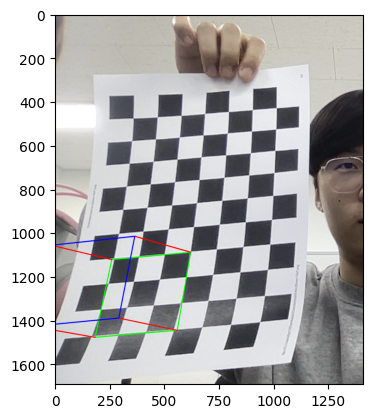

In [17]:
im=cv2.imread('./images/chess2.png')
gray=cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
ret,corners = cv2.findChessboardCorners(gray,(wc,hc),None)
im=cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
if ret == True:
    _,rvec,tvec,_=cv2.solvePnPRansac(objp,corners,mtx,dist)
    imgpts,_=cv2.projectPoints(axis,rvec,tvec,mtx,dist)

    img = draw_cube(im,corners,imgpts)

    plt.imshow(img)
    plt.show()
